# **Wind Power Forecasting Using ANFIS+RSA**

## **Dataset Description**

The dataset consists of measurements from a wind turbine recorded at 10-minute intervals from January 1, 2018. The features included in the dataset are:

1.Date/Time: The timestamp of the measurement.

2.LV ActivePower (kW): The actual power generated by the wind turbine in kilowatts.

3.Wind Speed (m/s): The speed of the wind in meters per second.

4.Theoretical_Power_Curve (KWh): The theoretical power output of the turbine based on the wind speed.

5.Wind Direction (°): The direction of the wind in degrees.

## **Problem Statement**

The goal is to build a model to forecast wind power generation for the next 15 days. Accurate wind power forecasting is critical for efficient energy management and planning in wind farms.

## **Task Overview**

You are required to develop a wind power forecasting model using the Adaptive Neuro-Fuzzy Inference System (ANFIS) combined with the Reptile Search Algorithm (RSA) for optimization. The task involves both univariate and multivariate forecasting approaches:

### **1.Univariate Forecasting:**

-Focuses on predicting the LV ActivePower (kW) using past values of the same feature.

-Implement and compare ten different models: SARIMAX, Linear Regression, Ridge Regression, Lasso Regression, KNN, Decision

### **2.Multivariate Forecasting:**

-Predicts LV ActivePower (kW) using multiple features: Wind Speed, Theoretical_Power_Curve, and Wind Direction.

-Perform feature extraction using PCA (Principal Component Analysis).

-Develop and evaluate an LSTM model using the extracted features.

## **Target Feature**

-LV ActivePower (kW): The target variable for both univariate and multivariate forecasting.

# **Import Python Libraries**

In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=695a5eda869cf963f3a19132d85a4567d9baad1529130290bc69eb36f6aec305
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
#from reptile.reptile import Reptile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Add more imports as needed for specific models
#import anfis as anf
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Data **reading**

In [ ]:
data = pd.read_csv('/content/T1.csv')


# **Data descovery**

In [ ]:
data.head(25)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [ ]:
data.shape

(50530, 5)

In [ ]:
data.dtypes

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

In [ ]:
data.count()

Date/Time                        50530
LV ActivePower (kW)              50530
Wind Speed (m/s)                 50530
Theoretical_Power_Curve (KWh)    50530
Wind Direction (°)               50530
dtype: int64

In [ ]:
data.describe(include='all')

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530,50530.000000,50530.000000,50530.000000,50530.000000
unique,50530,NaN,NaN,NaN,NaN
top,01 01 2018 00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,1307.684332,7.557952,1492.175463,123.687559
std,NaN,1312.459242,4.227166,1368.018238,93.443736
min,NaN,-2.471405,0.000000,0.000000,0.000000
25%,NaN,50.677890,4.201395,161.328167,49.315437
50%,NaN,825.838074,7.104594,1063.776283,73.712978
75%,NaN,2482.507568,10.300020,2964.972462,201.696720


In [ ]:
data['LV ActivePower (kW)'].value_counts()

LV ActivePower (kW)
0.000000       10781
3602.670898        5
3602.268066        5
3603.145996        5
3602.216064        5
               ...  
3135.654053        1
3223.466064        1
2877.299072        1
2619.701904        1
2820.466064        1
Name: count, Length: 38764, dtype: int64

In [ ]:
# Convert Date/Time to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%d %m %Y %H:%M')
data.set_index('Date/Time', inplace=True)

In [ ]:
data.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


# **EDA Exploratory Data Analysis**

## **Summary Statistics**

In [ ]:
# Summary statistics
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
LV ActivePower (kW),50530.0,1307.684332,1312.459242,-2.471405,50.677890,825.838074,2482.507568,3618.732910
Wind Speed (m/s),50530.0,7.557952,4.227166,0.000000,4.201395,7.104594,10.300020,25.206011
Theoretical_Power_Curve (KWh),50530.0,1492.175463,1368.018238,0.000000,161.328167,1063.776283,2964.972462,3600.000000
Wind Direction (°),50530.0,123.687559,93.443736,0.000000,49.315437,73.712978,201.696720,359.997589


## **Plot the Target Variable Over Time**

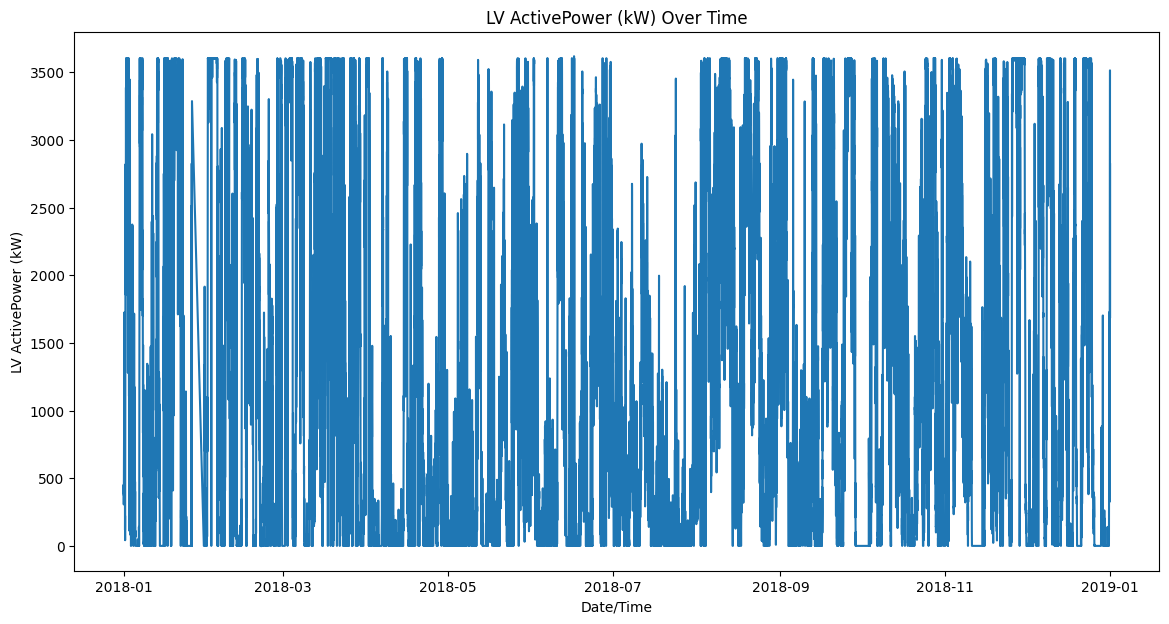

In [ ]:
# Plot the target variable over time
plt.figure(figsize=(14, 7))
plt.plot(data['LV ActivePower (kW)'])
plt.title('LV ActivePower (kW) Over Time')
plt.xlabel('Date/Time')
plt.ylabel('LV ActivePower (kW)')
plt.show()

## **Pair Plot**

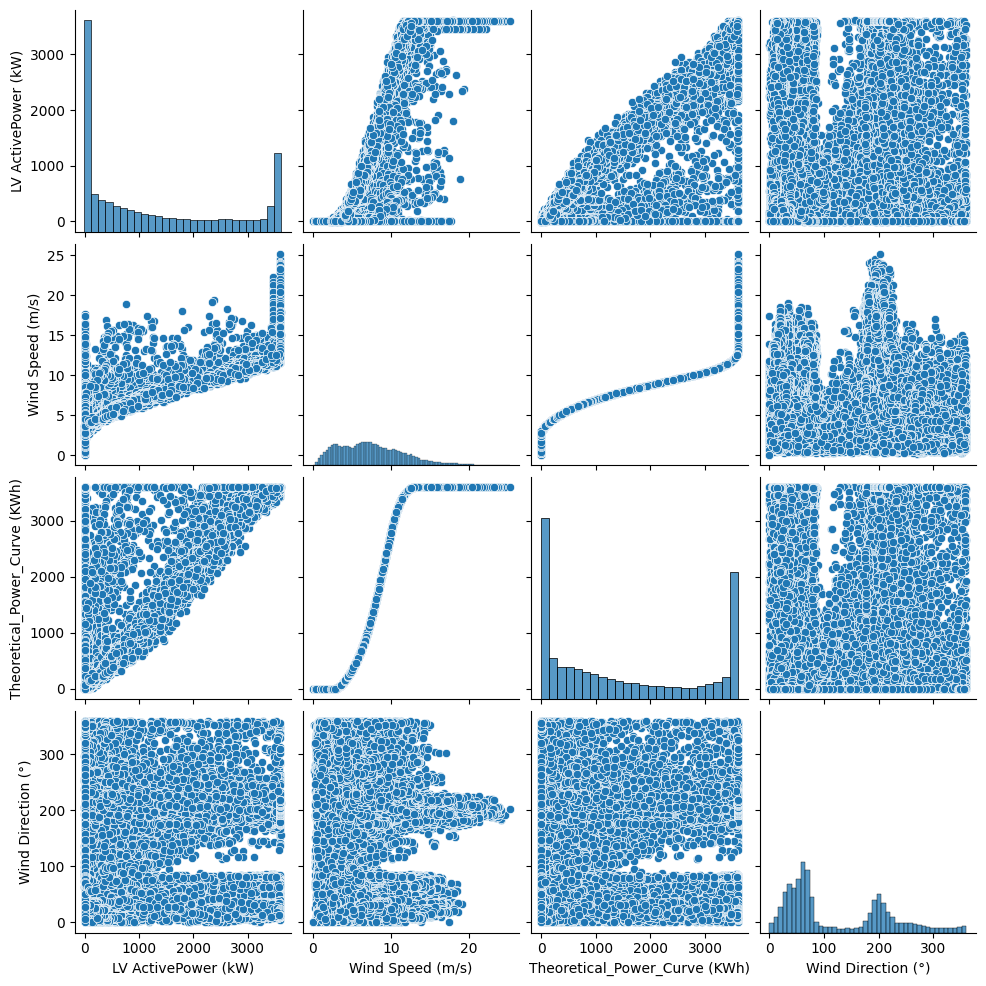

In [ ]:
import seaborn as sns
sns.pairplot(data)
plt.show()

## **Correlation Heatmap**

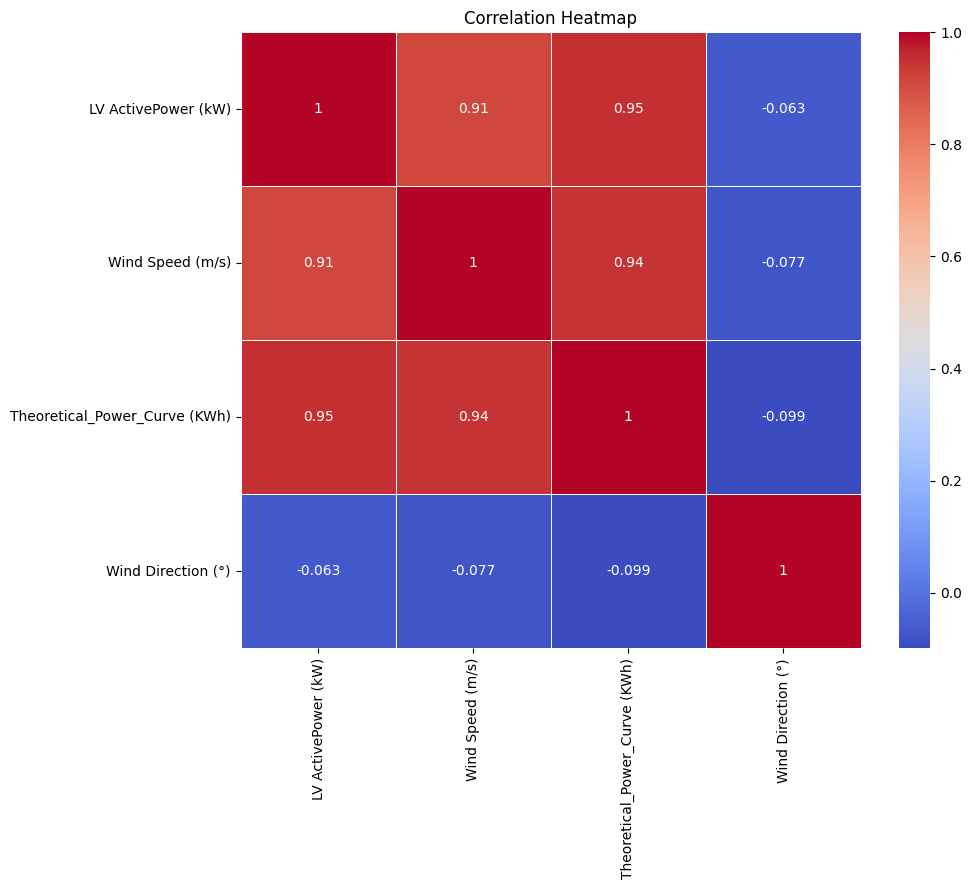

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## **Distribution Plots**a

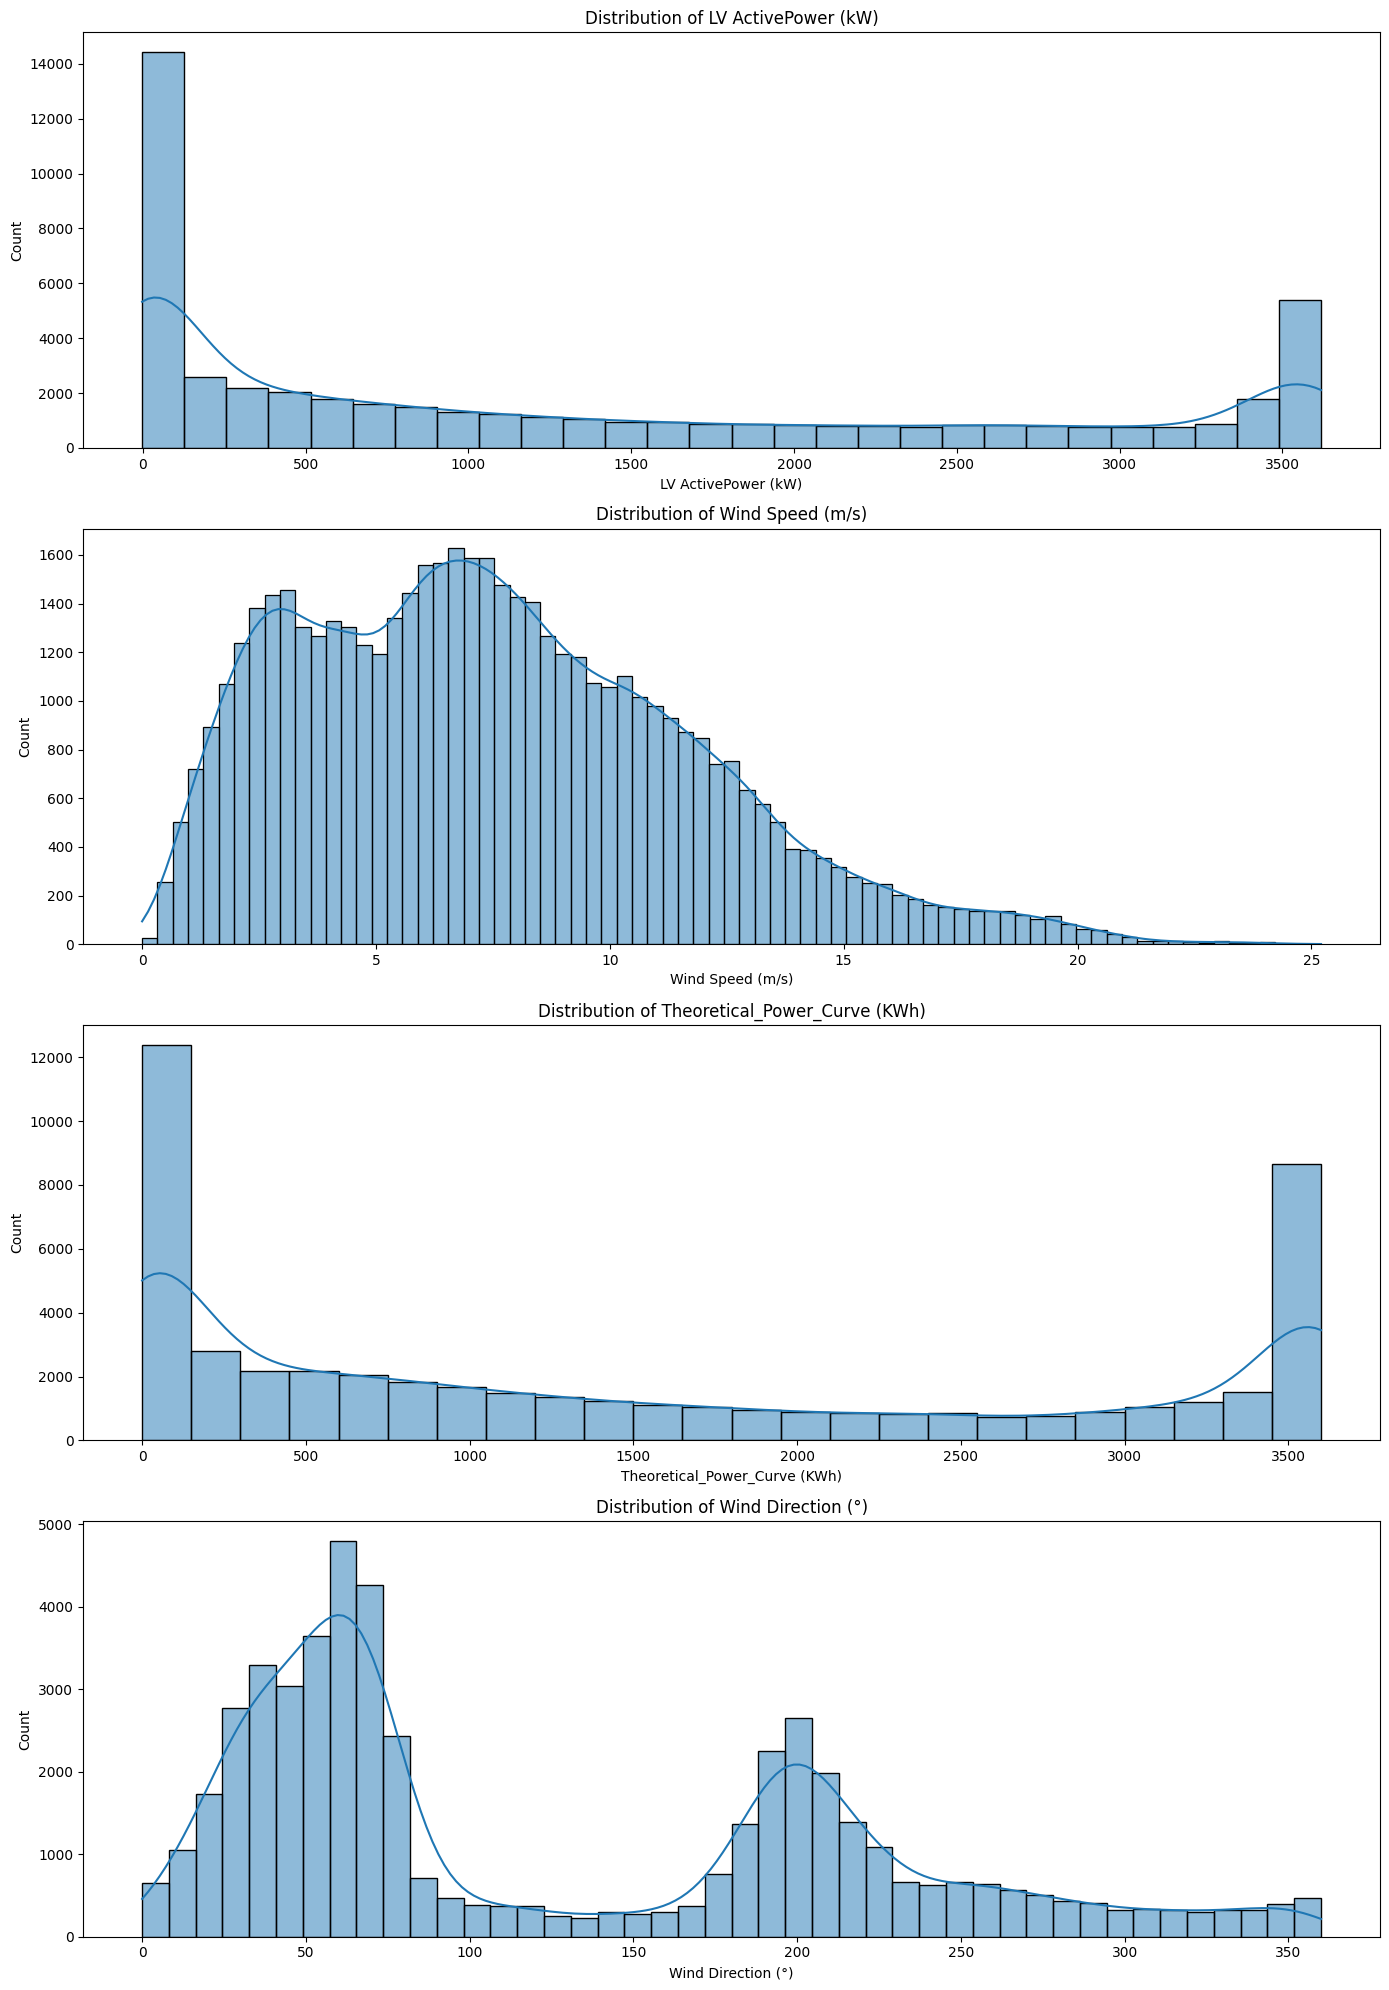

In [ ]:
features = data.columns
plt.figure(figsize=(14, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## **Resampling**

Resample the data to a different frequency  (e.g., hourly, daily).

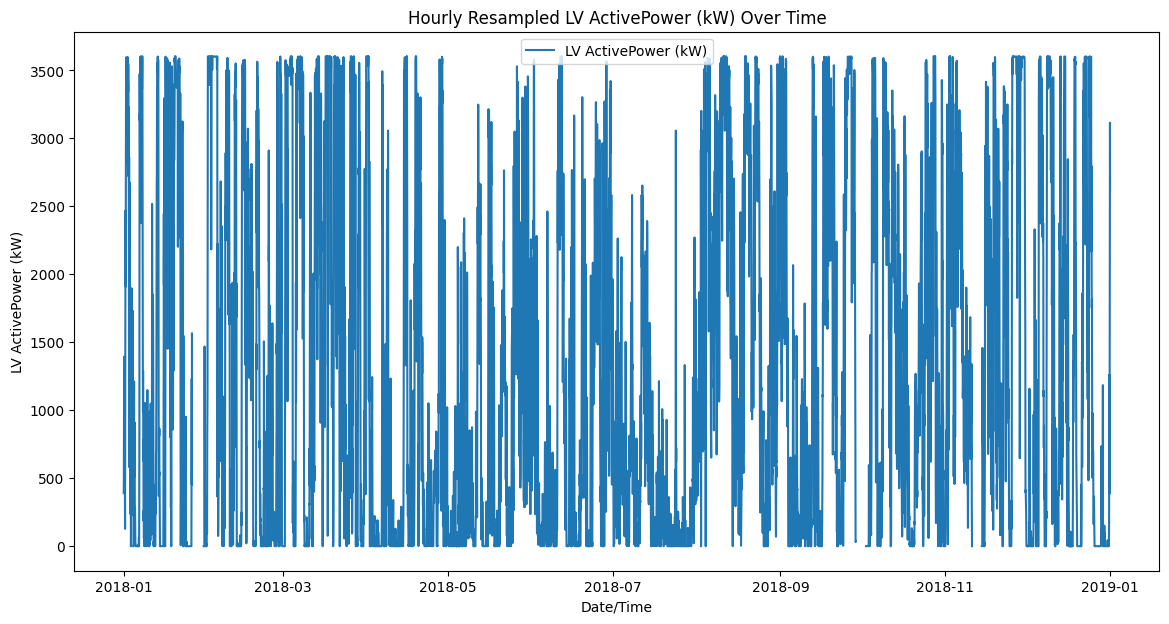

In [ ]:
# Resample the data to hourly frequency and take the mean
data_hourly = data.resample('H').mean()

# Plot the resampled data
plt.figure(figsize=(14, 7))
plt.plot(data_hourly['LV ActivePower (kW)'], label='LV ActivePower (kW)')
plt.title('Hourly Resampled LV ActivePower (kW) Over Time')
plt.xlabel('Date/Time')
plt.ylabel('LV ActivePower (kW)')
plt.legend()

# **Data preprocessing**

In [ ]:
data.isnull().sum()

LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [ ]:
data.duplicated().sum()

9

In [ ]:
new_data=data.drop_duplicates()

In [ ]:
new_data.duplicated().sum()

0

# **Dataset Split**

In [ ]:
y = data['LV ActivePower (kW)']
X = data.drop(['LV ActivePower (kW)'], axis=1)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Building**

## **Univariate Forecasting**

1.Define the models:

Create a list of models: SARIMAX, Linear Regression, Ridge, Lasso, KNN, Decision Tree, Gradient Boost, XGBoost, Random Forest, LSTM.

2.Prepare the data:

Create a function to prepare the data for each model.

**1.Prepare the data**

In [ ]:
# Prepare the data
def prepare_data(series, n_lags=1):
    X, y = [], []
    for i in range(n_lags, len(series)):
        X.append(series[i-n_lags:i])
        y.append(series[i])
    return np.array(X), np.array(y)

series = data['LV ActivePower (kW)']
X, y = prepare_data(series, n_lags=10)  # example with 10 lags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**2.Define Models**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense, LSTM

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNN": KNeighborsRegressor(),
    "DT": DecisionTreeRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "RandomForest": RandomForestRegressor(),
    "LSTM": Sequential([LSTM(50, input_shape=(X_train.shape[1], 1)), Dense(1)])
}


**3.Train Models**

In [ ]:
# Train Models
results = {}
for name, model in models.items():
    if name == 'LSTM':
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train.reshape(-1, 10, 1), y_train, epochs=50, batch_size=64, verbose=0)
        predictions = model.predict(X_test.reshape(-1, 10, 1)).flatten()
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
    results[name] = predictions

316/316 [==============================] - 1s 3ms/step


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")

**4.Visualization of Results**

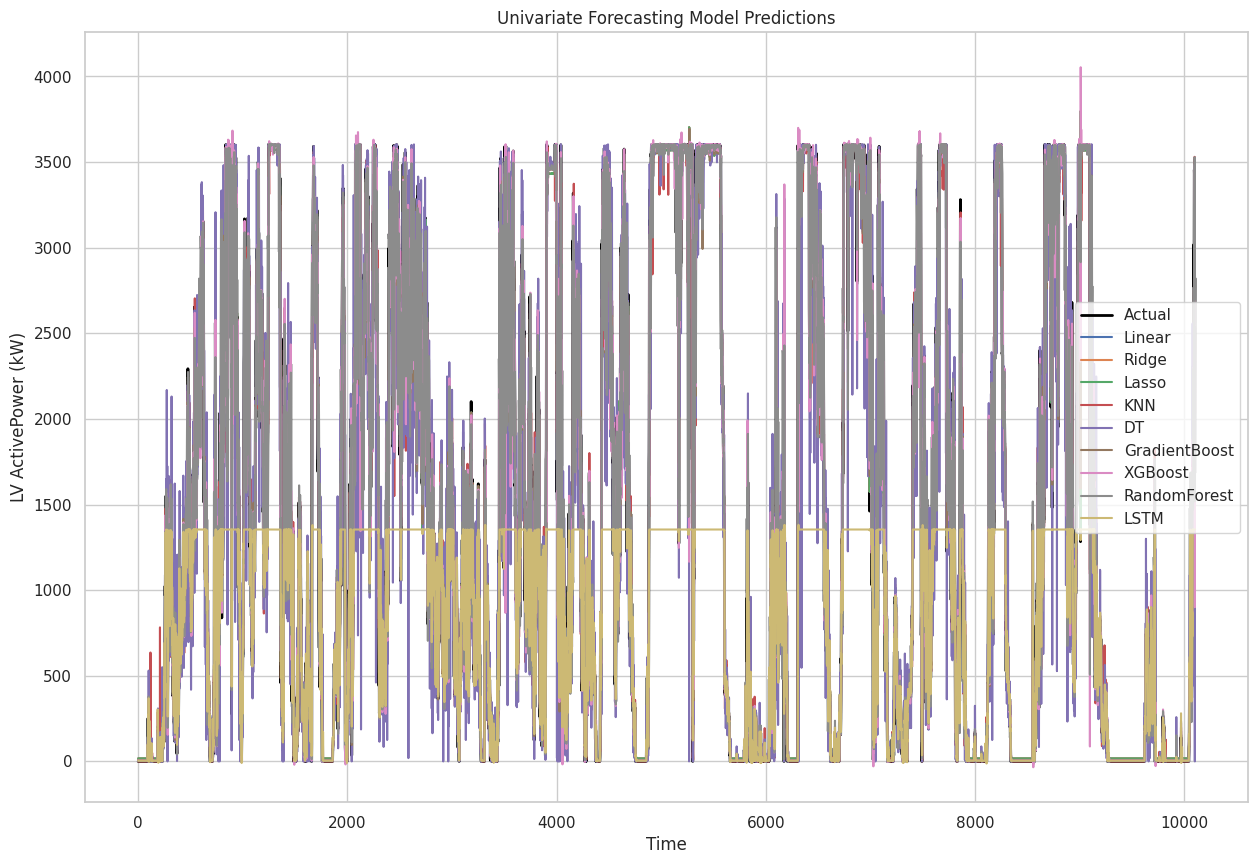

In [ ]:
plt.figure(figsize=(15, 10))

# Plot actual values
plt.plot(y_test, label='Actual', color='black', linewidth=2)

# Plot predictions from each model
for name, predictions in results.items():
    plt.plot(predictions, label=name)

plt.title('Univariate Forecasting Model Predictions')
plt.xlabel('Time')
plt.ylabel('LV ActivePower (kW)')
plt.legend()
plt.show()

**5.Evaluate Models**

In [ ]:
for name, predictions in results.items():
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f'{name} RMSE: {rmse}')

Linear RMSE: 226.7122696740842
Ridge RMSE: 226.7122696716506
Lasso RMSE: 226.71147508193818
KNN RMSE: 254.806812126409
DT RMSE: 341.27826108165226
GradientBoost RMSE: 227.0417517885154
XGBoost RMSE: 241.0061269992857
RandomForest RMSE: 235.88208995145837
LSTM RMSE: 1100.3419422865795


## **Multivariate Forecasting 1**

**1.Feature Extraction using PCA:**

**Apply PCA to reduce dimensionality.**

In [ ]:
from sklearn.decomposition import PCA

X = data[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y = data['LV ActivePower (kW)']

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

**2.Prepare data for LSTM:**

In [ ]:
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, shuffle=False)

X_train, X_test = [], []
for i in range(10, len(X_reduced_train)):
    X_train.append(X_reduced_train[i-10:i])
for i in range(10, len(X_reduced_test)):
    X_test.append(X_reduced_test[i-10:i])

X_train, X_test = np.array(X_train), np.array(X_test)

**3.Train LSTM model:**

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train[10:], epochs=50, batch_size=64)
predictions = model.predict(X_test)
# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test[10:], predictions))
print(f'Multivariate LSTM RMSE: {rmse}')

Epoch 1/50
632/632 [==============================] - 12s 14ms/step - loss: 3262400.7500
Epoch 2/50
632/632 [==============================] - 9s 14ms/step - loss: 3135704.5000
Epoch 3/50
632/632 [==============================] - 10s 15ms/step - loss: 3048853.7500
Epoch 4/50
632/632 [==============================] - 6s 9ms/step - loss: 2972769.7500
Epoch 5/50
632/632 [==============================] - 5s 8ms/step - loss: 2900263.2500
Epoch 6/50
632/632 [==============================] - 5s 8ms/step - loss: 2829581.5000
Epoch 7/50
632/632 [==============================] - 5s 7ms/step - loss: 2762110.0000
Epoch 8/50
632/632 [==============================] - 5s 9ms/step - loss: 2694863.2500
Epoch 9/50
632/632 [==============================] - 5s 8ms/step - loss: 2628722.5000
Epoch 10/50
632/632 [==============================] - 4s 7ms/step - loss: 2564600.5000
Epoch 11/50
632/632 [==============================] - 6s 9ms/step - loss: 2501950.5000
Epoch 12/50
632/632 [===============

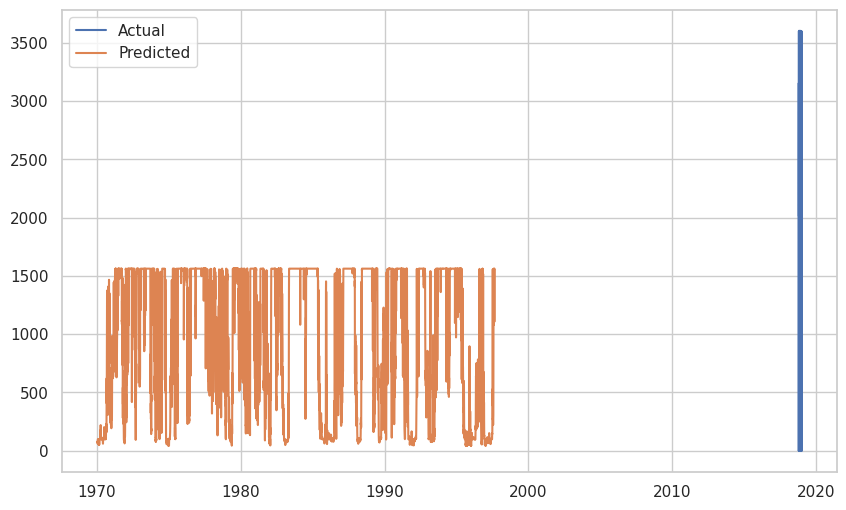

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[10:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()